GeoPandasによる全国市区町村界、都道府県界データの作成
===============================================

例えばESRIジャパンの提供する全国市区町村界データは使いやすいもののArcGIS以外では使えないという使用規約になっている。

そこで、[国土数値情報](https://nlftp.mlit.go.jp/ksj/gml/datalist/KsjTmplt-N03-v2_3.html)のデータを使って近いものを再現する。


**ToDo: Code Cleaning**

## References

### 手法の参考
- https://hayatoiijima.jimdofree.com/2017/11/14/%E9%83%BD%E9%81%93%E5%BA%9C%E7%9C%8C%E5%A2%83%E3%81%AE%E3%81%BF%E3%81%AEshp%E3%83%95%E3%82%A1%E3%82%A4%E3%83%AB%E3%81%AE%E4%BD%9C%E3%82%8A%E6%96%B9/
- https://www.esrij.com/gis-guide/other-dataformat/free-gis-data/
- http://xnissy.hatenablog.com/entry/20160205/1454666764
- https://note.com/kinari_iro/n/nfee9bc97b6d7

### データソース
- [国土数値情報ダウンロード](https://nlftp.mlit.go.jp/ksj/gml/datalist/KsjTmplt-N03-v2_3.html)
- [e-Stat](https://www.e-stat.go.jp/gis)
- [全国市区町村界データ](https://www.esrij.com/products/japan-shp/)
    - [ArcGIS](https://www.esrij.com/products/arcgis/)以外では使用不可

In [1]:
import geopandas as gpd

display(gpd.__version__)

'0.8.1'

- [国土数値情報](https://nlftp.mlit.go.jp/ksj/gml/datalist/KsjTmplt-N03-v2_3.html)から「全国, 世界測地系」のデータをダウンロード
    - 例えば"N03-190101_GML.zip"などのファイル名
    - 400MB近くある（年々増えてる?）ので注意

In [2]:
gdf = gpd.read_file("data/N03-19_190101.shp")
gdf

,N03_001,N03_002,N03_003,N03_004,N03_007,geometry
0,北海道,オホーツク総合振興局,None,北見市,01208,"POLYGON ((144.08144 44.12506, 144.08143 44.125..."
1,北海道,オホーツク総合振興局,None,北見市,01208,"POLYGON ((143.78333 44.18453, 143.78281 44.183..."
2,北海道,オホーツク総合振興局,None,網走市,01211,"POLYGON ((144.29495 44.00826, 144.29501 44.008..."
3,北海道,オホーツク総合振興局,None,網走市,01211,"POLYGON ((144.29602 44.01118, 144.29572 44.010..."
4,北海道,オホーツク総合振興局,None,網走市,01211,"POLYGON ((144.29266 44.01945, 144.29295 44.018..."
...,...,...,...,...,...,...
117575,沖縄県,None,八重山郡,与那国町,47382,"POLYGON ((122.98986 24.47191, 122.98999 24.471..."
117576,沖縄県,None,八重山郡,与那国町,47382,"POLYGON ((122.96591 24.47171, 122.96587 24.471..."
117577,沖縄県,None,八重山郡,与那国町,47382,"POLYGON ((122.99042 24.47248, 122.99036 24.472..."
117578,沖縄県,None,八重山郡,与那国町,47382,"POLYGON ((122.99804 24.47512, 122.99820 24.475..."


## 市区町村界

- `N03_007`でdissolveする
    - `N03_004`だと「中央区」や「北区」などで重複しそうなので
- また、`N03_007`に関する欠損値も落としておく
    - 全く異なる都道府県、市区町村同士のデータが結合してしまう可能性がある

Ref:
- https://geopandas.org/aggregation_with_dissolve.html

In [3]:
%%time
gdf_dissolved = gdf.dropna(subset=['N03_007']).dissolve(by='N03_007')
gdf_dissolved

CPU times: user 3min 3s, sys: 607 ms, total: 3min 4s
Wall time: 3min 4s


,geometry,N03_001,N03_002,N03_003,N03_004
N03_007,,,,,
01101,"POLYGON ((141.34233 43.06682, 141.34285 43.066...",北海道,石狩振興局,札幌市,中央区
01102,"POLYGON ((141.40839 43.18395, 141.40833 43.183...",北海道,石狩振興局,札幌市,北区
01103,"POLYGON ((141.44707 43.15616, 141.44694 43.155...",北海道,石狩振興局,札幌市,東区
01104,"POLYGON ((141.46244 43.10010, 141.46265 43.100...",北海道,石狩振興局,札幌市,白石区
01105,"POLYGON ((141.38463 43.04670, 141.38479 43.046...",北海道,石狩振興局,札幌市,豊平区
...,...,...,...,...,...
47361,"MULTIPOLYGON (((126.82034 26.26934, 126.82043 ...",沖縄県,None,島尻郡,久米島町
47362,"MULTIPOLYGON (((127.76445 26.12312, 127.76447 ...",沖縄県,None,島尻郡,八重瀬町
47375,"MULTIPOLYGON (((124.72860 24.65694, 124.72852 ...",沖縄県,None,宮古郡,多良間村


- データ数的に大丈夫そうだが、一応描画して確認

CPU times: user 42.1 s, sys: 752 ms, total: 42.8 s
Wall time: 42.7 s


<AxesSubplot:>

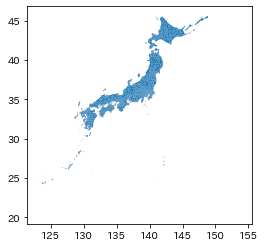

In [4]:
%%time
gdf_dissolved.plot()

### 保存

Ref:
- https://geopandas.org/io.html#writing-spatial-data



#### shape

In [21]:
! mkdir city_shape

In [5]:
%%time
gdf_dissolved.to_file("city_shape/shikuchousonkai.shp", encoding='utf-8')

CPU times: user 59.4 s, sys: 284 ms, total: 59.7 s
Wall time: 59.7 s


In [6]:
%%time

# check
gpd.read_file("city_shape/shikuchousonkai.shp")

CPU times: user 9.02 s, sys: 212 ms, total: 9.23 s
Wall time: 9.23 s


,N03_007,N03_001,N03_002,N03_003,N03_004,geometry
0,01101,北海道,石狩振興局,札幌市,中央区,"POLYGON ((141.34233 43.06682, 141.34285 43.066..."
1,01102,北海道,石狩振興局,札幌市,北区,"POLYGON ((141.40839 43.18395, 141.40833 43.183..."
2,01103,北海道,石狩振興局,札幌市,東区,"POLYGON ((141.44707 43.15616, 141.44694 43.155..."
3,01104,北海道,石狩振興局,札幌市,白石区,"POLYGON ((141.46244 43.10010, 141.46265 43.100..."
4,01105,北海道,石狩振興局,札幌市,豊平区,"POLYGON ((141.38463 43.04670, 141.38479 43.046..."
...,...,...,...,...,...,...
1897,47361,沖縄県,None,島尻郡,久米島町,"MULTIPOLYGON (((126.82034 26.26934, 126.82043 ..."
1898,47362,沖縄県,None,島尻郡,八重瀬町,"MULTIPOLYGON (((127.76445 26.12312, 127.76447 ..."
1899,47375,沖縄県,None,宮古郡,多良間村,"MULTIPOLYGON (((124.72860 24.65694, 124.72852 ..."
1900,47381,沖縄県,None,八重山郡,竹富町,"MULTIPOLYGON (((123.75465 24.06330, 123.75463 ..."


#### GeoJSON

In [7]:
%%time
gdf_dissolved.to_file("city_shikuchousonkai.geojson", driver="GeoJSON", encoding='utf-8')

CPU times: user 2min 32s, sys: 1.45 s, total: 2min 34s
Wall time: 2min 34s


In [8]:
%%time

# check
gpd.read_file("city_shikuchousonkai.geojson")

CPU times: user 1min 11s, sys: 1.18 s, total: 1min 13s
Wall time: 1min 12s


,N03_007,N03_001,N03_002,N03_003,N03_004,geometry
0,01101,北海道,石狩振興局,札幌市,中央区,"POLYGON ((141.34233 43.06682, 141.34285 43.066..."
1,01102,北海道,石狩振興局,札幌市,北区,"POLYGON ((141.40839 43.18395, 141.40833 43.183..."
2,01103,北海道,石狩振興局,札幌市,東区,"POLYGON ((141.44707 43.15616, 141.44694 43.155..."
3,01104,北海道,石狩振興局,札幌市,白石区,"POLYGON ((141.46244 43.10010, 141.46265 43.100..."
4,01105,北海道,石狩振興局,札幌市,豊平区,"POLYGON ((141.38463 43.04670, 141.38479 43.046..."
...,...,...,...,...,...,...
1897,47361,沖縄県,None,島尻郡,久米島町,"MULTIPOLYGON (((126.82034 26.26934, 126.82043 ..."
1898,47362,沖縄県,None,島尻郡,八重瀬町,"MULTIPOLYGON (((127.76445 26.12312, 127.76447 ..."
1899,47375,沖縄県,None,宮古郡,多良間村,"MULTIPOLYGON (((124.72860 24.65694, 124.72852 ..."
1900,47381,沖縄県,None,八重山郡,竹富町,"MULTIPOLYGON (((123.75465 24.06330, 123.75463 ..."


#### geobuf

Ref:
- [geobuf](https://github.com/pygeobuf/pygeobuf#usage)

In [9]:
! pip install geobuf

In [10]:
import json
import geobuf

In [11]:
pbf = geobuf.encode(
    json.loads(gdf_dissolved.to_json())
)

In [13]:
%%time
with open("shikuchousonkai.buf", "wb") as f:
    f.write(pbf)

CPU times: user 954 µs, sys: 44 ms, total: 45 ms
Wall time: 48.7 ms


In [14]:
gdf_prefecture = gpd.read_file("city_shape/shikuchousonkai.shp")

gdf_prefecture

,N03_007,N03_001,N03_002,N03_003,N03_004,geometry
0,01101,北海道,石狩振興局,札幌市,中央区,"POLYGON ((141.34233 43.06682, 141.34285 43.066..."
1,01102,北海道,石狩振興局,札幌市,北区,"POLYGON ((141.40839 43.18395, 141.40833 43.183..."
2,01103,北海道,石狩振興局,札幌市,東区,"POLYGON ((141.44707 43.15616, 141.44694 43.155..."
3,01104,北海道,石狩振興局,札幌市,白石区,"POLYGON ((141.46244 43.10010, 141.46265 43.100..."
4,01105,北海道,石狩振興局,札幌市,豊平区,"POLYGON ((141.38463 43.04670, 141.38479 43.046..."
...,...,...,...,...,...,...
1897,47361,沖縄県,None,島尻郡,久米島町,"MULTIPOLYGON (((126.82034 26.26934, 126.82043 ..."
1898,47362,沖縄県,None,島尻郡,八重瀬町,"MULTIPOLYGON (((127.76445 26.12312, 127.76447 ..."
1899,47375,沖縄県,None,宮古郡,多良間村,"MULTIPOLYGON (((124.72860 24.65694, 124.72852 ..."
1900,47381,沖縄県,None,八重山郡,竹富町,"MULTIPOLYGON (((123.75465 24.06330, 123.75463 ..."


- データ量が多いので、もう少し間引く必要がありそう
    - https://geopandas.org/geometric_manipulations.html#GeoSeries.simplify

In [25]:
%%time
gdf_prefecture2 = gdf_prefecture.copy()
gdf_prefecture2['geometry'] = gdf_prefecture2['geometry'].simplify(tolerance=0.00085)

gdf_prefecture2

CPU times: user 59.8 s, sys: 55.5 ms, total: 59.9 s
Wall time: 1min


,N03_007,N03_001,N03_002,N03_003,N03_004,geometry
0,01101,北海道,石狩振興局,札幌市,中央区,"POLYGON ((141.34233 43.06682, 141.35464 43.068..."
1,01102,北海道,石狩振興局,札幌市,北区,"POLYGON ((141.40839 43.18395, 141.40427 43.182..."
2,01103,北海道,石狩振興局,札幌市,東区,"POLYGON ((141.44707 43.15616, 141.45443 43.137..."
3,01104,北海道,石狩振興局,札幌市,白石区,"POLYGON ((141.46244 43.10010, 141.46569 43.100..."
4,01105,北海道,石狩振興局,札幌市,豊平区,"POLYGON ((141.38463 43.04670, 141.38558 43.047..."
...,...,...,...,...,...,...
1897,47361,沖縄県,None,島尻郡,久米島町,"MULTIPOLYGON (((126.82034 26.26934, 126.82094 ..."
1898,47362,沖縄県,None,島尻郡,八重瀬町,"MULTIPOLYGON (((127.76445 26.12312, 127.76242 ..."
1899,47375,沖縄県,None,宮古郡,多良間村,"MULTIPOLYGON (((124.72860 24.65694, 124.72847 ..."
1900,47381,沖縄県,None,八重山郡,竹富町,"MULTIPOLYGON (((123.75465 24.06330, 123.75455 ..."


CPU times: user 44.1 s, sys: 460 ms, total: 44.5 s
Wall time: 44.6 s


<AxesSubplot:>

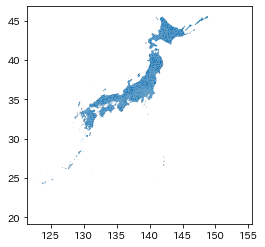

In [26]:
%%time
gdf_prefecture2.plot()

In [27]:
%%time
gdf_prefecture2.to_file("city_shikuchousonkai_simple.geojson", driver='GeoJSON', encoding='utf-8')

CPU times: user 17.6 s, sys: 91.8 ms, total: 17.7 s
Wall time: 17.7 s


In [28]:
%%time
gdf_prefecture2.to_file("city_shape_simple/shikuchousonkai.shp", encoding='utf-8')

CPU times: user 11.5 s, sys: 83.7 ms, total: 11.6 s
Wall time: 11.7 s


## 都道府県界

大元のデータを都道府県でdissolveしても良いが、市区町村界の結果を使う（未確認だが、計算量が減りそうな気がするので）

In [29]:
gdf_prefecture2_dissolved = gdf_prefecture2.dissolve('N03_001')
gdf_prefecture2_dissolved

,geometry,N03_007,N03_002,N03_003,N03_004
N03_001,,,,,
三重県,"MULTIPOLYGON (((136.02497 33.75121, 136.02505 ...",24201,None,None,津市
京都府,"MULTIPOLYGON (((135.31410 35.45566, 135.31255 ...",26101,None,京都市,北区
佐賀県,"MULTIPOLYGON (((130.16976 33.04632, 130.16890 ...",41201,None,None,佐賀市
兵庫県,"MULTIPOLYGON (((134.81349 34.15525, 134.81346 ...",28101,None,神戸市,東灘区
北海道,"MULTIPOLYGON (((140.43455 41.65891, 140.43206 ...",01101,石狩振興局,札幌市,中央区
千葉県,"MULTIPOLYGON (((139.89894 34.89797, 139.89887 ...",12101,None,千葉市,中央区
和歌山県,"MULTIPOLYGON (((135.45985 33.54664, 135.45917 ...",30201,None,None,和歌山市
埼玉県,"MULTIPOLYGON (((139.58954 35.78031, 139.59414 ...",11101,None,さいたま市,西区
大分県,"MULTIPOLYGON (((131.93439 32.72091, 131.93480 ...",44201,None,None,大分市


In [30]:
gds = gdf_prefecture2_dissolved.copy().geometry

gds

N03_001
三重県     MULTIPOLYGON (((136.02497 33.75121, 136.02505 ...
京都府     MULTIPOLYGON (((135.31410 35.45566, 135.31255 ...
佐賀県     MULTIPOLYGON (((130.16976 33.04632, 130.16890 ...
兵庫県     MULTIPOLYGON (((134.81349 34.15525, 134.81346 ...
北海道     MULTIPOLYGON (((140.43455 41.65891, 140.43206 ...
千葉県     MULTIPOLYGON (((139.89894 34.89797, 139.89887 ...
和歌山県    MULTIPOLYGON (((135.45985 33.54664, 135.45917 ...
埼玉県     MULTIPOLYGON (((139.58954 35.78031, 139.59414 ...
大分県     MULTIPOLYGON (((131.93439 32.72091, 131.93480 ...
大阪府     MULTIPOLYGON (((135.18058 34.34070, 135.18257 ...
奈良県     POLYGON ((136.09345 34.19570, 136.09416 34.193...
宮城県     MULTIPOLYGON (((140.85659 37.89099, 140.85994 ...
宮崎県     MULTIPOLYGON (((131.37793 31.49056, 131.38701 ...
富山県     MULTIPOLYGON (((137.17989 36.75589, 137.18037 ...
山口県     MULTIPOLYGON (((132.15260 33.84317, 132.15060 ...
山形県     MULTIPOLYGON (((140.26713 37.91758, 140.26644 ...
山梨県     MULTIPOLYGON (((138.52689 35.37885, 138.52817 ...
岐阜県   

<AxesSubplot:>

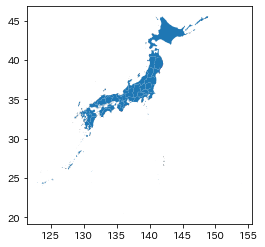

In [31]:
gds.plot()

In [53]:
%%time
gds_simple = gds.simplify(tolerance=0.035,  preserve_topology=False)

CPU times: user 210 ms, sys: 7.97 ms, total: 218 ms
Wall time: 222 ms


In [54]:
gds_simple

N03_001
三重県     POLYGON ((136.03152 33.77229, 136.01196 33.723...
京都府     POLYGON ((136.02846 34.81912, 136.02816 34.706...
佐賀県     POLYGON ((130.16976 33.04632, 130.22492 32.960...
兵庫県     MULTIPOLYGON (((135.09290 34.64036, 134.96625 ...
北海道     MULTIPOLYGON (((147.72211 45.17322, 147.86977 ...
千葉県     POLYGON ((139.82465 34.91130, 139.75292 34.974...
和歌山県    MULTIPOLYGON (((135.45985 33.54664, 135.33063 ...
埼玉県     POLYGON ((139.58954 35.78031, 139.39215 35.763...
大分県     POLYGON ((132.00296 33.06660, 131.88981 32.992...
大阪府     POLYGON ((135.18058 34.34070, 135.43175 34.530...
奈良県     POLYGON ((136.09345 34.19570, 136.10409 34.025...
宮城県     POLYGON ((140.85659 37.89099, 140.85475 37.797...
宮崎県     POLYGON ((131.37793 31.49056, 131.34223 31.361...
富山県     POLYGON ((137.17989 36.75589, 137.39576 36.786...
山口県     MULTIPOLYGON (((132.23399 33.96763, 132.33118 ...
山形県     POLYGON ((140.26713 37.91758, 140.29851 37.807...
山梨県     POLYGON ((138.52689 35.37885, 138.53314 35.200...
岐阜県   

<AxesSubplot:>

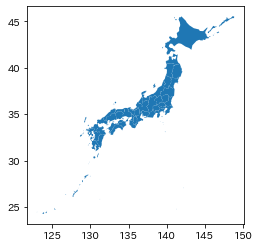

In [55]:
gds_simple.plot()

In [57]:
gds_simple.to_file("prefecture.geojson", driver='GeoJSON')

In [60]:
import folium
m = folium.Map()

folium.GeoJson(gds_simple.to_json()).add_to(m)
m.save("prefecture_test.html")

- [prefecture_test.html](./prefecture_test.html)


うまくsimplifyをしないと境界ががたつくので難しい

-------

# make attribution

- [利用規約](https://nlftp.mlit.go.jp/ksj/other/agreement.html)に従う必要がある
-　加工しているので、加工している旨は書かないといけない

Attribution Example:
- <a href='https://nlftp.mlit.go.jp/ksj/gml/datalist/KsjTmplt-N03-v2_3.html' target='_blank'>「国土数値情報(行政区域データ)」(国土交通省)</a>を元にして作成
